## Important parameters
<br>xt_ocean: longitude, length 3600
<br>yt_ocean: latitude, length 1500
<br> [mind map](https://miro.com/app/board/o9J_lM4N1Pg=/?fromRedirect=1)

In [1]:
import netCDF4 as nc4
from tensorflow import keras
import xarray,numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras import layers
import tensorflow

# Load data

In [4]:
import glob
input_data_split = []
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_102/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_103/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_104/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_215/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_222/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_250/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_286/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_307/*.np[yz]'):
    input_data_split.append(np.load(np_name))
print(len(input_data_split))
for np_name in glob.glob('C:/Users/Yuxuan/Desktop/data/dataset_317/*.np[yz]'):
    input_data_split.append(np.load(np_name))
input_data_split = np.array(input_data_split)
input_data_split.shape

7305
14610
21915
29220
37499
45778
53083
61362


(69641, 128, 128, 1)

# Fix Missing Value

In [5]:
def fix_missing_value(input_data):
    """
    input 3d matrix
    """
    for i in range(0,len(input_data)):
        arr = input_data[i]
        arr[np.isnan(arr)] = 0
    return input_data

# Min Max Scaling

In [6]:
def min_max_scale(input_data, max_value, min_value):
    """
    input 3d matrix
    """
    for i in range(len(input_data)):
        input_data[i] = (input_data[i] - min_value)/(max_value - min_value)
    return input_data

# Preprocessing

In [7]:
# import random
# n = 3000 # sample size
# random.seed(7)
# input_data_split = np.array(random.sample(input_data_split.tolist(),n))
# input_data_split.shape

In [8]:
input_data_split = fix_missing_value(input_data_split)
max_value = np.amax(input_data_split)
min_value = np.amin(input_data_split)
input_data_split_scaled = min_max_scale(input_data_split, max_value, min_value)

In [9]:
print(max_value)
print(min_value)

1.2512589
-1.4648885


In [10]:
input_data_split_scaled.shape

(69641, 128, 128, 1)

# split train set & validation set

In [11]:
train_set, test_set = train_test_split(input_data_split, test_size=0.3333333, random_state=26)

train_set_scaled, test_set_scaled = train_test_split(input_data_split_scaled, test_size=0.3333333, random_state=26)
np.array(train_set_scaled).shape

(46427, 128, 128, 1)

# Autoencoder

In [12]:
lat = 128 # chunk size
long = 128 # chunk size

input_img = keras.Input(shape=(lat, long,1))

x = layers.Conv2D(64,(4,4), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (4, 4), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(4, (4, 4), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(4, (4, 4), activation='relu',strides=(1,1), padding='same')(x)

x = layers.Conv2DTranspose(8, (4, 4), strides=(1, 1),activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(16, (4, 4), strides=(2, 2),activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (4, 4), strides=(2, 2),activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, (4, 4), strides=(1, 1), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(64, (4, 4), strides=(1, 1),activation='relu', padding='same')(x)
# x = layers.Conv2DTranspose(128, (4, 4), strides=(2, 2),activation='relu', padding='same')(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        32800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        8208      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         2056  

In [14]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.000001)
history = autoencoder.fit(train_set_scaled, train_set_scaled,
                epochs=1000, batch_size=256, validation_data=(test_set_scaled, test_set_scaled),callbacks=[callback])

Epoch 1/1000
182/182 [==============================] - 4493s 25s/step - loss: 0.0059 - val_loss: 4.6699e-04
Epoch 2/1000
182/182 [==============================] - 4454s 24s/step - loss: 4.4155e-04 - val_loss: 4.5214e-04
Epoch 3/1000
182/182 [==============================] - 4471s 25s/step - loss: 2.7979e-04 - val_loss: 2.0036e-04
Epoch 4/1000
182/182 [==============================] - 4496s 25s/step - loss: 2.5518e-04 - val_loss: 1.9453e-04
Epoch 5/1000
182/182 [==============================] - 4525s 25s/step - loss: 2.2043e-04 - val_loss: 2.2807e-04
Epoch 6/1000
182/182 [==============================] - 4497s 25s/step - loss: 1.7725e-04 - val_loss: 1.8497e-04
Epoch 7/1000
182/182 [==============================] - 4596s 25s/step - loss: 1.7067e-04 - val_loss: 1.2753e-04
Epoch 8/1000
182/182 [==============================] - 4589s 25s/step - loss: 1.6052e-04 - val_loss: 2.4782e-04
Epoch 9/1000
182/182 [==============================] - 4589s 25s/step - loss: 1.4334e-04 - val_loss

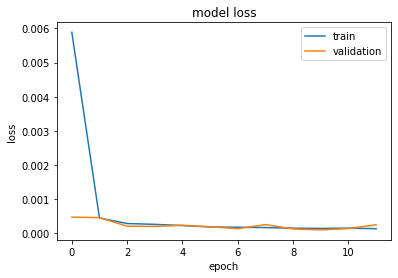

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
test_sample_index = 122

# select a sample
original_data = test_set[test_sample_index]
original_data.shape

test_data = (original_data - min_value)/(max_value - min_value) # preprocessing
test_data.shape

decoded_data = autoencoder.predict(np.expand_dims(test_data, 0)) 
decoded_data = decoded_data*(max_value-min_value) + min_value   # scale back

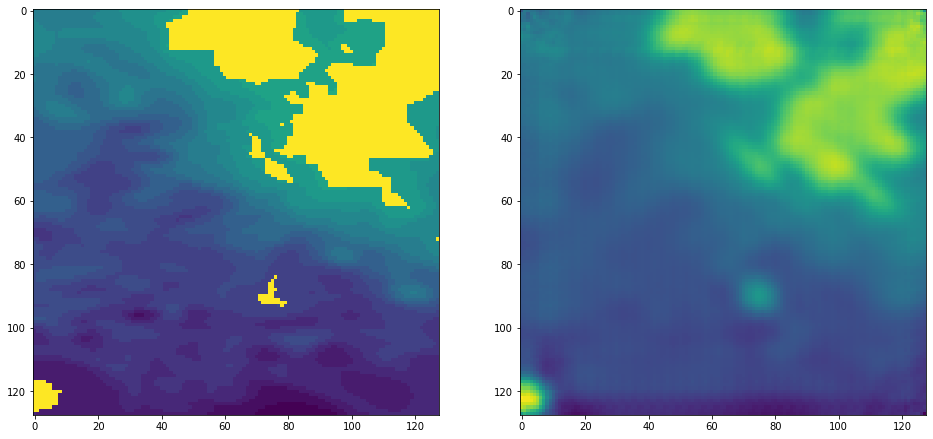

In [47]:
fig = plt.figure(figsize=(16,32)) # image
ax1 = fig.add_subplot(1,2,1) 
ax1.imshow(original_data)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(decoded_data.reshape(128,128))

In [45]:
original_data[0]

array([[0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.37078652],
       [0.38202247],
       [0.38202247],
       [0.38202247],
       [0.38202247],
       [0.38202247],
       [0.38202247],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.39325845],
       [0.40449435],
       [0.40449435],
       [0.40449435],
       [0.40449435],
       [0.40449435],
       [0.415

In [32]:
np.amax(original_data)

0.53932583

In [33]:
np.amin(original_data)

0.24719101

In [34]:
np.amax(decoded_data)

0.646356

In [35]:
np.amin(decoded_data)

0.22379935

In [40]:
ax3.imshow((original_data-decoded_data).reshape(128,128),cmap='hot')

mse:  0.0013188755


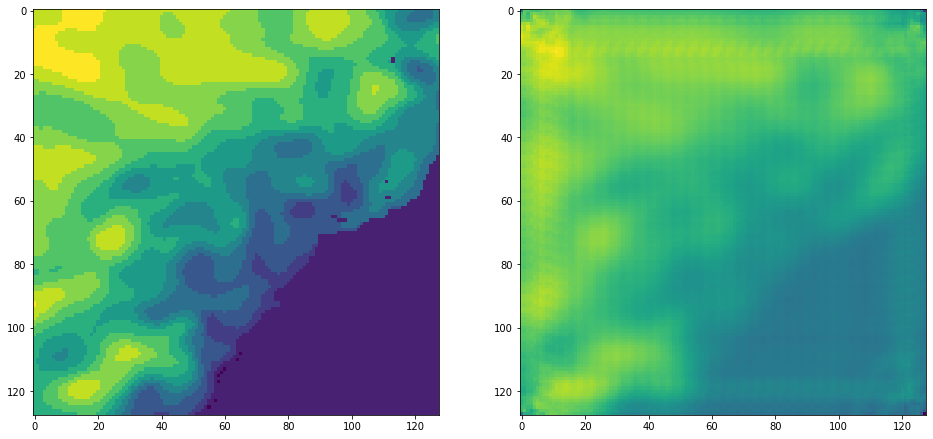

In [50]:
test_sample_index = 6546

# select a sample
original_data = test_set[test_sample_index]
original_data.shape

test_data = (original_data - min_value)/(max_value - min_value) # preprocessing
test_data.shape

decoded_data = autoencoder.predict(np.expand_dims(test_data, 0)) 
decoded_data = decoded_data*(max_value-min_value) + min_value   # scale back

fig = plt.figure(figsize=(16,32)) # image
ax1 = fig.add_subplot(1,2,1) 
ax1.imshow(original_data)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(decoded_data.reshape(128,128))
print('mse: ',np.square((original_data-decoded_data)).mean())

In [ ]:
test_sample_index = 110

# select a sample
original_data = test_set[test_sample_index]
original_data.shape

test_data = (original_data - min_value)/(max_value - min_value) # preprocessing
test_data.shape

decoded_data = autoencoder.predict(np.expand_dims(test_data, 0)) 
decoded_data = decoded_data*(max_value-min_value) + min_value   # scale back

fig = plt.figure(figsize=(16,32)) # image
ax1 = fig.add_subplot(1,2,1) 
ax1.imshow(original_data,cmap='hot')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(decoded_data.reshape(128,128),cmap='hot')
print('mse: ',np.square((original_data-decoded_data)).mean())

In [22]:
mse

0.0015761419

In [24]:
autoencoder.save("autoencoder(32,32,4) layer(7-6) 9 regions all data")

INFO:tensorflow:Assets written to: autoencoder(32,32,4) layer(7-6) 9 regions all data\assets
